<a href="https://colab.research.google.com/github/kowshikkumarb/COVID19-Pneumonia-Detection/blob/main/P699.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, BatchNormalization,ZeroPadding2D, Dropout, Flatten, Dense
from keras.optimizers import Adam, SGD
from keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
image_prepro_path = '/content/gdrive/MyDrive/COVID-19_Radiography_Dataset_pp'
classes=["COVID","Normal","Viral Pneumonia"]
batch_size=16
num_of_classes = len(classes)
target_size=(255, 255)
# Splitting the dataset into 80:20 by ImageGenerator
data_generator = ImageDataGenerator(rotation_range=15, horizontal_flip=True, zoom_range=0.15, height_shift_range=0.15, width_shift_range=0.15, shear_range=0.2, fill_mode="nearest", rescale=1./255, validation_split=0.3)
# Loading images to train generator
train_set = data_generator.flow_from_directory(directory=image_prepro_path,
                                              target_size=target_size,
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size,
                                               color_mode="grayscale")
# Loading images to test generator
test_set = data_generator.flow_from_directory(directory=image_prepro_path,
                                              target_size=target_size,
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size
                                              ,color_mode="grayscale")

Found 9714 images belonging to 3 classes.
Found 4160 images belonging to 3 classes.


In [ ]:
def cnn_covid_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(32, (3, 3), activation='relu',padding='valid'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu',padding='valid'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(64, (3, 3), activation='relu',padding='valid'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu',padding='valid'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(128, (3, 3), activation='relu',padding='valid'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_of_classes, activation='softmax'))
    opt1 = SGD(lr=0.01, momentum=0.9, decay=0.001)
    opt2=Adam(learning_rate=0.0001)
    model.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=["accuracy"])
    model.summary()
    return model

In [ ]:
finalmodel = cnn_covid_model()
# fitting the model
history = finalmodel.fit_generator(train_set , validation_data=test_set, epochs=15, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 253, 253, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 251, 251, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 123, 123, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 123, 123, 64)      256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 121, 121, 64)      3

In [ ]:
scores = finalmodel.evaluate_generator(test_set, steps=len(test_set))
print(scores)
print('Model accuracy: {}'.format(scores[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.19076022505760193, 0.9348557591438293]
Model accuracy: 0.9348557591438293


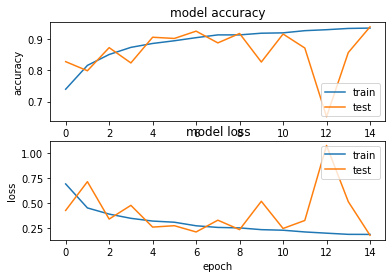

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()